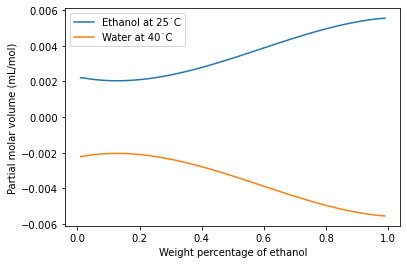

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as si

def molar_volume(x, A, B, C, D, E):
    return A + B*x + C*x**2 + D*x**3 + E*x**4

ethanol_weight_percent = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
density_25C = np.array([0.99799, 0.98061, 0.96808, 0.95155, 0.93521, 0.91778, 0.89532, 0.86838, 0.84248, 0.81570, 0.78808])
density_40C = np.array([0.99220, 0.97060, 0.96130, 0.94160, 0.92070, 0.89863, 0.87070, 0.85213, 0.82622, 0.80074, 0.77240])

x = ethanol_weight_percent / 100.0
y = 1.0 / (density_25C * 1000.0 / 18.02 + density_40C * 1000.0 / 46.07)

popt, pcov = si(molar_volume, x, y)

dx = 0.01
x_range = np.arange(dx, 1.0, dx)
ethanol_partial_molar_volume = np.gradient(molar_volume(x_range, *popt), dx)
water_partial_molar_volume = -np.gradient(molar_volume(x_range, *popt), dx)

plt.plot(x_range, ethanol_partial_molar_volume, label='Ethanol at 25˙C')
plt.plot(x_range, water_partial_molar_volume, label='Water at 40˙C')
plt.xlabel('Weight percentage of ethanol')
plt.ylabel('Partial molar volume (mL/mol)')
plt.legend()
plt.show()
